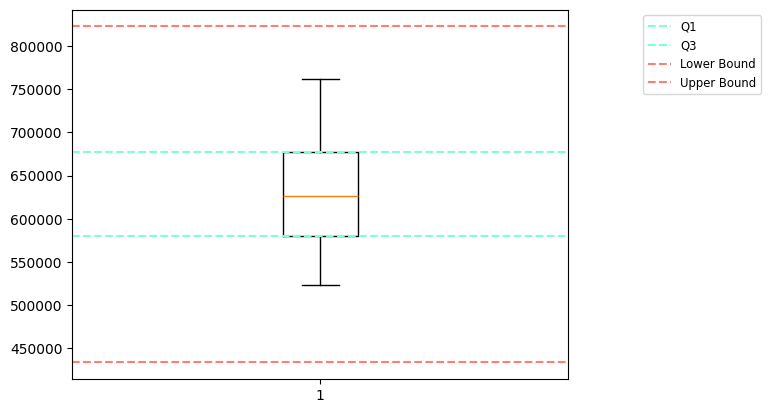

The average emissions level over the specified period is 629422.90625 units.There is a moderate amount of variability in the emissions data, with emissions values typically deviating from the average by approximately 56625.66070844867 units.
The maximum value is 762474 carbon dioxide equivalents (CO2e), as established by the United Nations Framework Convention on Climate Change (UNFCCC), corresponding to the year of 2011
The minimum value is 523162 carbon dioxide equivalents (CO2e), corresponding to the year of 1994
Lower bound for outliers: 433553.875
Upper bound for outliers: 822766.875
Outliers: Empty DataFrame
Columns: [sector, time, Greenlands total emission of greenhousegasses]
Index: []
There are not outliers in this dataset


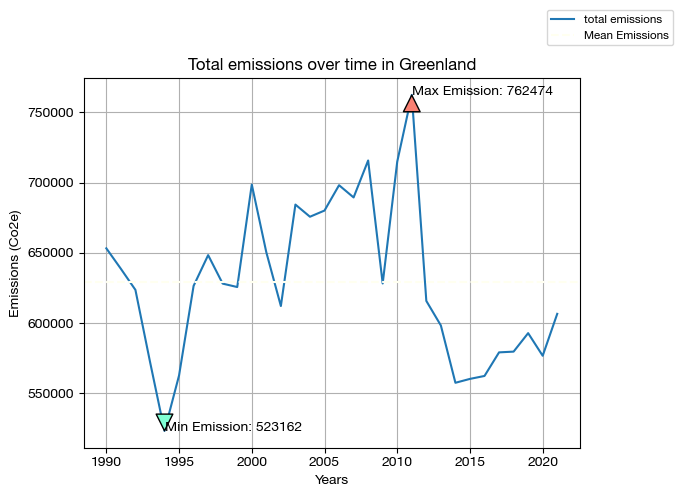

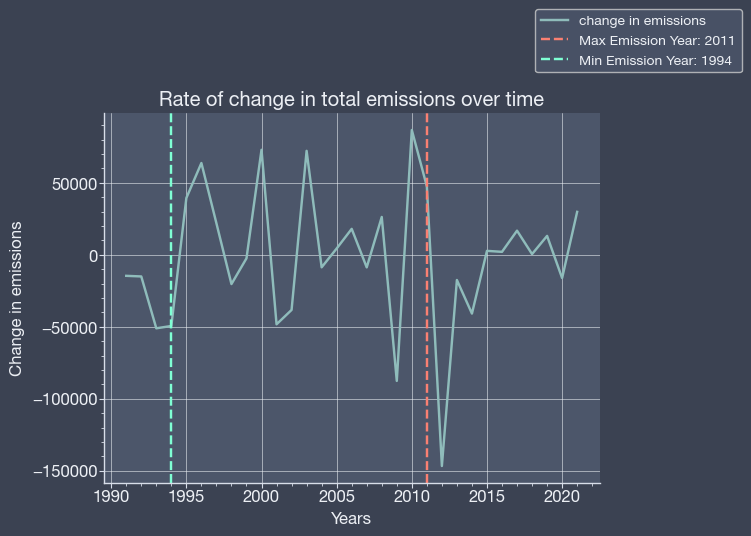

R-squared: 0.6160066600364945
RMSE: 34536.747306330726
Slope of Regression Line: 100836687070028.86


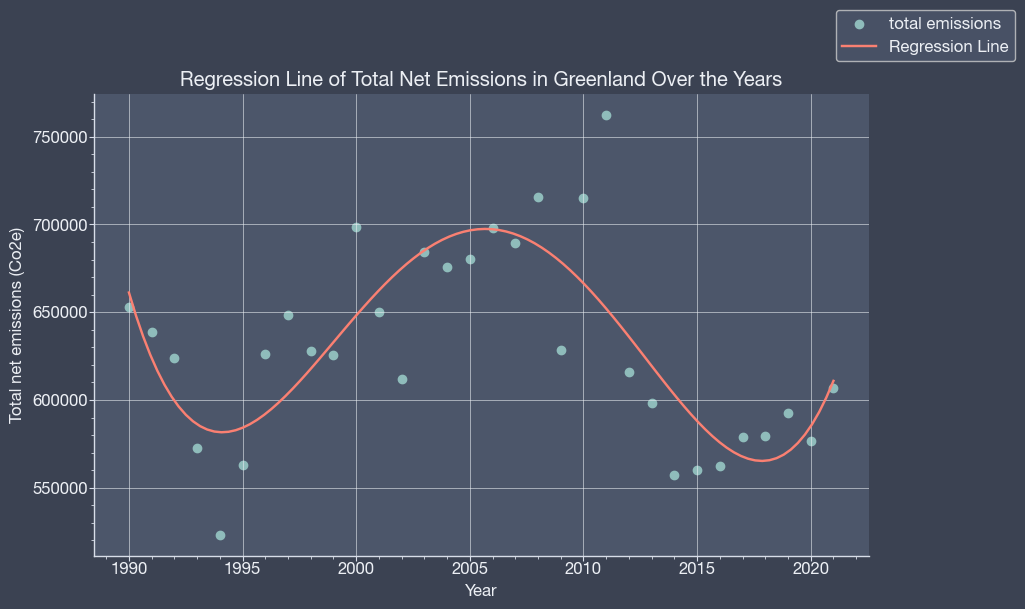

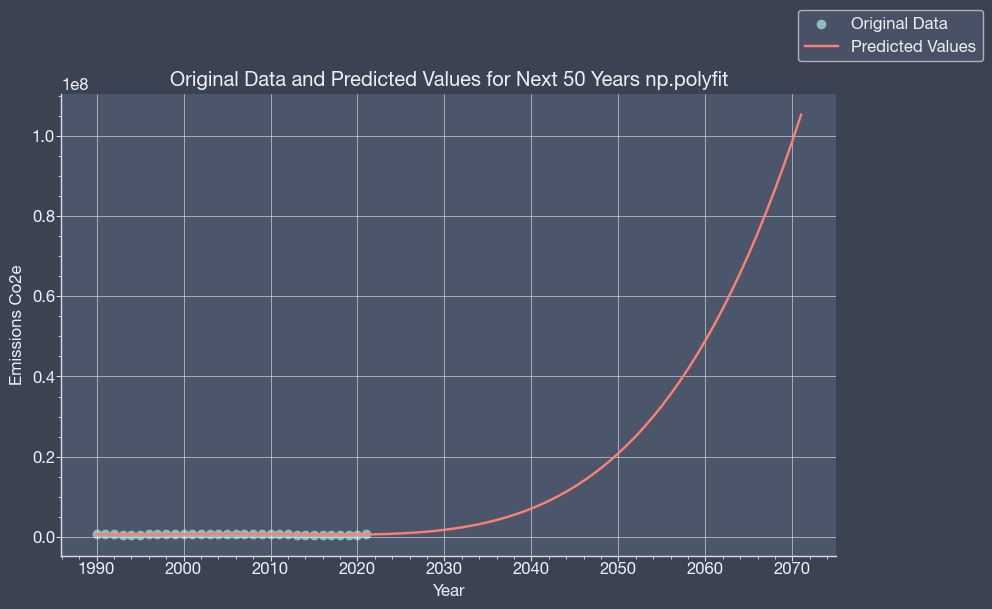

In [1]:
%run greenland_greenhouse_emissions_total.ipynb

In [2]:
industrial_df = df[df['sector'].isin(['Total (net emissions)', '2. Industrial Processes', '  2.A Solvents'])]
industrial_df = industrial_df.drop(columns=['greenhousegas'])
industrial_df

,sector,time,Greenlands total emission of greenhousegasses
0,Total (net emissions),1990,653216
1,Total (net emissions),1991,638634
2,Total (net emissions),1992,623622
3,Total (net emissions),1993,572582
4,Total (net emissions),1994,523162
...,...,...,...
251,2.A Solvents,2017,720
252,2.A Solvents,2018,911
253,2.A Solvents,2019,886
254,2.A Solvents,2020,746


In [3]:
#get the mean value for industrial processes emissions over the period between 1990-2020
mean_industrial_emissions = industrial_df[industrial_df['sector'] == '2. Industrial Processes']['Greenlands total emission of greenhousegasses'].mean()
std_dev_industrial_emissions = industrial_df[industrial_df['sector'] == '2. Industrial Processes']['Greenlands total emission of greenhousegasses'].std()

print(f'The average industrial processes emissions level over the specified period is {mean_industrial_emissions} units.\
There is quite a large amount of variability in the emissions data, with emissions values typically deviating \
from the average by approximately {std_dev_industrial_emissions} units.')

#select only total industrial processes' emissions, not divided by sub-sector
total_industrial_emissions = industrial_df[industrial_df['sector'] == '2. Industrial Processes']

#Find the index of the maximum value
max_index = total_industrial_emissions['Greenlands total emission of greenhousegasses'].idxmax()

# Get the corresponding year value using the index
max_year = industrial_df.loc[max_index, 'time']

# Get the maximum value
max_value = total_industrial_emissions['Greenlands total emission of greenhousegasses'].max()

print(f'The maximum value of industrial emissions is {max_value} carbon dioxide equivalents (CO2e),corresponding to the year of {max_year}')

#Find the index of the minimum value
min_index = total_industrial_emissions['Greenlands total emission of greenhousegasses'].idxmin()

# Get the corresponding year value using the index
min_year = industrial_df.loc[min_index, 'time']

# Get the minimum value
min_value = total_industrial_emissions['Greenlands total emission of greenhousegasses'].min()

print(f'The minimum value is {min_value} carbon dioxide equivalents (CO2e), corresponding to the year of {min_year}')

The average industrial processes emissions level over the specified period is 6173.6875 units.There is quite a large amount of variability in the emissions data, with emissions values typically deviating from the average by approximately 4381.582483587849 units.
The maximum value of industrial emissions is 13768 carbon dioxide equivalents (CO2e),corresponding to the year of 2020
The minimum value is 489 carbon dioxide equivalents (CO2e), corresponding to the year of 1996


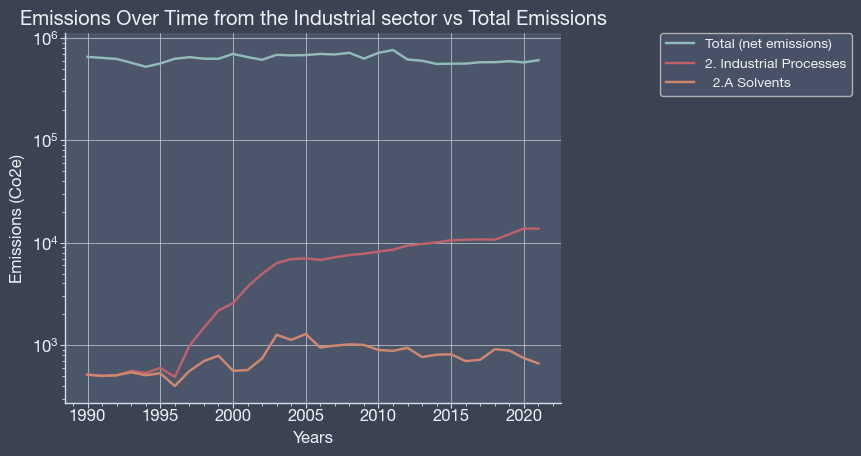

In [4]:
# Iterate over unique values in the 'sector' column
for sector in industrial_df['sector'].unique():
    # Filter rows for the current sector
    sector_df = industrial_df[industrial_df['sector'] == sector]
    # Plot the emissions against date for the current sector
    plt.plot(sector_df['time'], sector_df['Greenlands total emission of greenhousegasses'], label=sector)

# Set y-axis scale to logarithmic
plt.yscale('log')

plt.xlabel('Years')

plt.ylabel('Emissions (Co2e)')

plt.title('Emissions Over Time from the Industrial sector vs Total Emissions')

plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.6, 1.02))

plt.savefig('Emissions over time from the industrial sector versus total.jpg', bbox_inches='tight')

plt.show()